# Maximum Bipartite Matching

**TODO:**
Ford-Fulkerson algorithm implementation
1. Build a Flow Network 
2. Find the maximum flow (using Ford-Fulkerson algorithm)


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

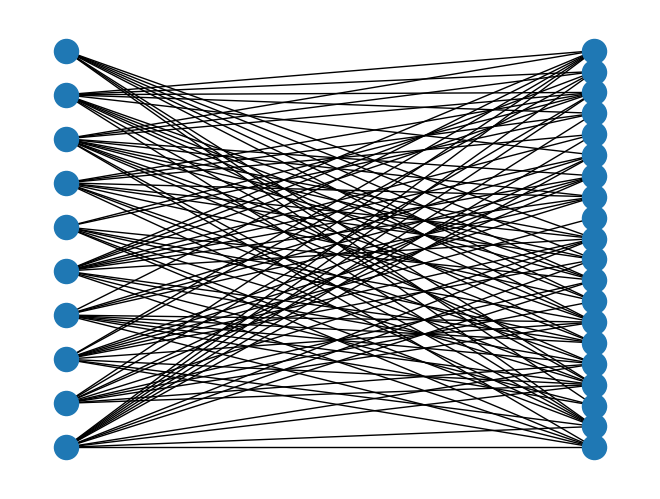

In [2]:
def create_bipartite_graph():
    G = nx.bipartite.random_graph(10,20,0.5)
    return G
# nx.draw(create_bipartite_graph(), with_labels=True)
drawn_graph = create_bipartite_graph()
nx.draw(drawn_graph, pos=nx.bipartite_layout(drawn_graph, nx.bipartite.sets(drawn_graph)[0]))

In [4]:
# Depth First Search funciton that returns true if a matching for `node` exists in `G_original`
def find_agumentin(G, left_nodes, right_nodes, current_node, current_match, visited) -> bool: 
    for candidate in right_nodes:
        if visited[candidate] == False: # G[current_node][candidate] and 
            visited[candidate] = True
            if current_match[candidate] == -1 or find_agumentin(G, left_nodes, right_nodes, current_match[candidate], current_match, visited):
                current_match[candidate] = current_node
                return True
    return False

In [5]:
def max_bipartite_matching(G_original, left_nodes, right_nodes) -> int:
    G = G_original

    # Array to keep what left element is connected to the right element
    # E.g., `current_match[0] = 10` means that 0 (left element) is connected to 10 (right_element)
    current_match = [-1] * (len(right_nodes) + len(left_nodes))
    count_match = 0

    for current_node in left_nodes:
        # Mark all `right_nodes` as not visited for next `current_node``
        visited = [False] * (len(right_nodes) + len(left_nodes))

        if find_agumentin(G, left_nodes, right_nodes, current_node, current_match, visited):
            count_match += 1
        
    return count_match

In [6]:
# Main
G_original = create_bipartite_graph()
left_nodes = {n for n, d in G_original.nodes(data=True) if d["bipartite"] == 0}
right_nodes = set(G_original) - left_nodes

max_bipartite_matching(G_original, left_nodes, right_nodes)

10